# Bike Share System

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

This chapter presents a simple model of a bike share system and
demonstrates the features of Python we'll use to develop simulations of real-world systems.

Along the way, we'll make decisions about how to model the system. In
the next chapter we'll review these decisions and gradually improve the model.

This chapter is available as a Jupyter notebook where you can read the text, run the code, and work on the exercises. 
Click here to access the notebooks: <https://allendowney.github.io/ModSimPy/>.

## Modeling a Bike Share System

Imagine a bike share system for students traveling between Olin College and Wellesley College, which are about three miles apart in eastern Massachusetts.

Suppose the system contains 12 bikes and two bike racks, one at Olin and one at Wellesley, each with the capacity to hold 12 bikes.

As students arrive, check out a bike, and ride to the other campus, the number of bikes in each location changes. In the simulation, we'll need to keep track of where the bikes are. To do that, we'll use a function called `State`, which is defined in the ModSim library.

In [4]:
bikeshare = State(olin=10, wellesley=2)

The equations in parentheses create two variables, `olin` and `wellesley`, and give them the values `10` and `2`.
The `State` function stores these variables and their values in a `State` object, which gets assigned to a new variable named `bikeshare`.

Variables stored inside a `State` object are called *state variables*.
In this example, the state variables represent the number of
bikes at each location. Their values indicate that there are 10 bikes at Olin and 2 at Wellesley. 

The `State` object is assigned to a new variable named `bikeshare`.
We can get the value of a variable in a `State` object using the *dot operator*, like this:

In [5]:
bikeshare.olin

10

And this:

In [6]:
bikeshare.wellesley

2

Or, to display all of the state variables and their values, you can enter just the name of the object:

In [7]:
bikeshare

olin         10
wellesley     2
Name: state, dtype: int64

These values make up the *state* of the system.

The ModSim library provides a function called `show` that displays a `State` object as a table.

In [8]:
show(bikeshare)

,state
olin,10
wellesley,2


You don't have to use `show`, but I think the results look better.

We can update the state by assigning new values to the variables. 
For example, if a student moves a bike from Olin to Wellesley, we can figure out the new values and assign them:

In [9]:
bikeshare.olin = 9
bikeshare.wellesley = 3

Or we can use *update operators*, `-=` and `+=`, to subtract 1 from
`olin` and add 1 to `wellesley`:

In [10]:
bikeshare.olin -= 1
bikeshare.wellesley += 1

The result is the same either way.

## Defining Functions

So far we have used functions defined in NumPy and the ModSim library. Now we're going to define our own functions.

When you are developing code in Jupyter, it is often efficient to write a few lines of code, test them to confirm they do what you intend, and then use them to define a new function. For example, these lines move a bike from Olin to Wellesley:

In [11]:
bikeshare.olin -= 1
bikeshare.wellesley += 1

Rather than repeat them every time a bike moves, we can define a new
function:

In [12]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

`def` is a special word in Python that indicates we are defining a new
function. The name of the function is `bike_to_wellesley`. The empty
parentheses indicate that this function requires no additional
information when it runs. The colon indicates the beginning of an
indented *code block*.

The next two lines are the *body* of the function. They have to be
indented; by convention, the indentation is four spaces.

When you define a function, it has no immediate effect. The body of the
function doesn't run until you *call* the function. Here's how to call
this function:

In [13]:
bike_to_wellesley()

When you call the function, it runs the statements in the body, which
update the variables of the `bikeshare` object; you can check by
displaying the new state.

In [14]:
show(bikeshare)

,state
olin,6
wellesley,6


When you call a function, you have to include the parentheses. If you
leave them out, you get this:

In [15]:
bike_to_wellesley

<function __main__.bike_to_wellesley()>

This result indicates that `bike_to_wellesley` is a function. You don't have to know what `__main__` means, but if you see something like this, it probably means that you named a function but didn't actually call it.
So don't forget the parentheses.

## Print Statements

As you write more complicated programs, it is easy to lose track of what
is going on. One of the most useful tools for debugging is the *print statement*, which displays text in the Jupyter notebook.

Normally when Jupyter runs the code in a cell, it displays the value of
the last line of code. For example, if you run:

In [16]:
bikeshare.olin
bikeshare.wellesley

6

Jupyter runs both lines, but it only displays the value of the
second. If you want to display more than one value, you can use
print statements:

In [17]:
print(bikeshare.olin)
print(bikeshare.wellesley)

6
6


When you call the `print` function, you can put a variable in
parentheses, as in the previous example, or you can provide a sequence
of variables separated by commas, like this:

In [18]:
print(bikeshare.olin, bikeshare.wellesley)

6 6


Python looks up the values of the variables and displays them; in this
example, it displays two values on the same line, with a space between
them.

Print statements are useful for debugging functions. For example, we can
add a print statement to `bike_to_wellesley`, like this:

In [19]:
def bike_to_wellesley():
    print('Moving a bike to Wellesley')
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

Each time we call this version of the function, it displays a message,
which can help us keep track of what the program is doing.
The message in this example is a *string*, which is a sequence of
letters and other symbols in quotes.

Just like `bike_to_wellesley`, we can define a function that moves a
bike from Wellesley to Olin:

In [20]:
def bike_to_olin():
    print('Moving a bike to Olin')
    bikeshare.wellesley -= 1
    bikeshare.olin += 1

And call it like this:

In [21]:
bike_to_olin()

Moving a bike to Olin


One benefit of defining functions is that you avoid repeating chunks of
code, which makes programs smaller. Another benefit is that the name you
give the function documents what it does, which makes programs more
readable.

## If Statements

At this point we have functions that simulate moving bikes; now let's think about simulating customers. As a simple model of customer behavior, I will use a random number generator to determine when customers arrive at each station.

The ModSim library provides a function called `flip` that generates random "coin tosses".
When you call it, you provide a probability between 0 and 1, like this:

In [22]:
# this line sets the random number generator so the results in
# the book are the same every time we run it
np.random.seed(17)

In [23]:
flip(0.7)

True

The result is one of two values: `True` with probability 0.7 (in this example) or `False`
with probability 0.3. If you run `flip` like this 100 times, you should
get `True` about 70 times and `False` about 30 times. But the results
are random, so they might differ from these expectations.

`True` and `False` are special values defined by Python. 
They are called *boolean* values because they are
related to Boolean algebra (<https://modsimpy.com/boolean>).

Note that they are not strings. There is a difference between `True`, which is a boolean value, and `'True'`, which is a string.

We can use boolean values to control the behavior of the program, using an *if statement*:

In [24]:
if flip(0.5):
    print('heads')

If the result from `flip` is `True`, the program displays the string
`'heads'`. Otherwise it does nothing.

The syntax for `if` statements is similar to the syntax for
function definitions: the first line has to end with a colon, and the
lines inside the `if` statement have to be indented.

Optionally, you can add an *else clause* to indicate what should
happen if the result is `False`:

In [25]:
if flip(0.5):
    print('heads')
else:
    print('tails')    

heads


If you run the previous cell a few times, it should print `heads` about half the time, and `tails` about half the time.

Now we can use `flip` to simulate the arrival of customers who want to
borrow a bike. Suppose students arrive at the Olin station every two
minutes on average.
In that case, the chance of an arrival during any one-minute period is 50%, and we can simulate it like this:

In [26]:
if flip(0.5):
    bike_to_wellesley()

Moving a bike to Wellesley


If students arrive at the Wellesley station every three minutes, on average,
the chance of an arrival during any one-minute period is 33%, and we can
simulate it like this:

In [27]:
if flip(0.33):
    bike_to_olin()

We can combine these snippets into a function that simulates a *time step*, which is an interval of time, in this case one minute:

In [28]:
def step():
    if flip(0.5):
        bike_to_wellesley()
    
    if flip(0.33):
        bike_to_olin()

Then we can simulate a time step like this:

In [29]:
step()

Depending on the results from `flip`, this function might move a bike to Olin, or to Wellesley, or neither, or both.

## Parameters

The previous version of `step` is fine if the arrival probabilities
never change, but in reality they vary over time.

So instead of putting the constant values 0.5 and 0.33 in `step`, we can replace them with *parameters*.
Parameters are variables whose values are set when a function is called.

Here's a version of `step` that takes two parameters, `p1` and `p2`:

In [30]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

The values of `p1` and `p2` are not set inside this function; instead,
they are provided when the function is called, like this:

In [31]:
step(0.5, 0.33)

Moving a bike to Olin


The values you provide when you call the function are called
*arguments*. The arguments, `0.5` and `0.33` in this example, get
assigned to the parameters, `p1` and `p2`, in order. So running this
function has the same effect as:

In [32]:
p1 = 0.5
p2 = 0.33

if flip(p1):
    bike_to_wellesley()
    
if flip(p2):
    bike_to_olin()

Moving a bike to Wellesley


The advantage of using parameters is that you can call the same function many times, providing different arguments each time.

Adding parameters to a function is called *generalization*, because it makes the function more general; without parameters, the function always does the same thing; with parameters, it can do a range of things.

## For Loops

At some point you will get sick of running cells over and over.
Fortunately, there is an easy way to repeat a chunk of code, the *for loop*. Here's an example:

In [33]:
for i in range(3):
    print(i)
    bike_to_wellesley()

0
Moving a bike to Wellesley
1
Moving a bike to Wellesley
2
Moving a bike to Wellesley


The syntax here should look familiar; the first line ends with a
colon, and the lines inside the `for` loop are indented. The other
elements of the loop are:

-   The words `for` and `in` are special words we have to use in a for
    loop.

-   `range` is a Python function we use to control the number of times the loop runs.

-   `i` is a *loop variable* that gets created when the for loop runs.

When this loop runs, it runs the statements inside the loop three times.  The first time, the value of `i` is `0`; the second time, it is `1`; the third time, it is `2`.

Each time through the loop, it prints the value of `i` and moves one bike to Wellesley.

## TimeSeries

When we run a simulation, we often want to save the results for later analysis. The ModSim library provides a `TimeSeries` object for this purpose. A `TimeSeries` contains a sequence of timestamps and a
corresponding sequence of quantities.

In this example, the timestamps are integers representing minutes and the quantities are the number of bikes at one location.

Since we have moved a number of bikes around, let's start again with a new `State` object.

In [34]:
bikeshare = State(olin=10, wellesley=2)

We can create a new, empty `TimeSeries` like this:

In [35]:
results = TimeSeries()

And we can add a quantity like this:

In [36]:
results[0] = bikeshare.olin

The number in brackets is the timestamp, also called a *label*.

We can use a `TimeSeries` inside a for loop to store the results of the simulation:

In [37]:
for i in range(3):
    print(i)
    step(0.6, 0.6)
    results[i+1] = bikeshare.olin

0
Moving a bike to Wellesley
1
Moving a bike to Olin
2
Moving a bike to Olin


Each time through the loop, we print the value of `i` and call `step`, which updates `bikeshare`.
Then we store the number of bikes at Olin in `results`. 
We use the loop variable, `i`, to compute the timestamp, `i+1`.

The first time through the loop, the value of `i` is `0`, so the timestamp is `1`.
The last time, the value of `i` is `2`, so the timestamp is `3`.

When the loop exits, `results` contains 4 timestamps, from 0 through
3, and the number of bikes at Olin at the end of each time step.

We can display the `TimeSeries` like this:

In [38]:
show(results)

,Quantity
Time,
0,10
1,9
2,10
3,11


The left column is the timestamps; the right column is the quantities.

## Plotting

`results` provides a function called `plot` we can use to plot
the results, and the ModSim library provides `decorate`, which we can use to label the axes and give the figure a title:

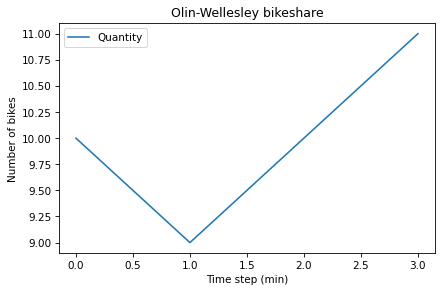

In [39]:
results.plot()

decorate(title='Olin-Wellesley bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

The result should be a plot with time on the $x$-axis and the number of bikes on the $y$-axis.
Since we only ran three time steps, it might not be very interesting.

## Summary

This chapter introduces the tools we need to run simulations, record the results, and plot them.

We used a `State` object to represent the state of the system.
Then we used the `flip` function and an `if` statement to simulate a single time step.
We used a `for` loop to simulate a series of steps, and a `TimeSeries` to record the results.
Finally, we used `plot` and `decorate` to plot the results.

In the next chapter, we will extend this simulation to make it a little more realistic.

## Exercises

Before you go on, you might want to work on the following exercises.

### Exercise 1

What happens if you spell the name of a state variable wrong?  Edit the following cell, change the spelling of `wellesley`, and run it.

The error message uses the word *attribute*, which is another name for what we are calling a state variable. 

In [40]:
bikeshare = State(olin=10, wellesley=2)

bikeshare.welesley

AttributeError: 'Series' object has no attribute 'welesley'

### Exercise 2

Make a `State` object with a third state variable, called `downtown`, with initial value 0, and display the state of the system.

In [41]:
# Solution goes here
cur_bikeshare = State(olin=10, wellesley=2,downtown=0)
cur_bikeshare.downtown

0

### Exercise 3

Wrap the code in the chapter in a function named `run_simulation` that takes three parameters, named `p1`, `p2`, and `num_steps`.

It should:

1. Create a `TimeSeries` object to hold the results.

2. Use a for loop to run `step` the number of times specified by `num_steps`, passing along the specified values of `p1` and `p2`.

3. After each step, it should save the number of bikes at Olin in the `TimeSeries`.

4. After the for loop, it should plot the results and

5. Decorate the axes.

To test your function:

1. Create a `State` object with the initial state of the system.

2. Call `run_simulation` with parameters `p1=0.3`, `p2=0.2`, and `num_steps=60`.

In [46]:
# Solution goes here
def run_simulation(p1,p2,num_steps):
    test_results = TimeSeries()
    for i in range(num_steps):
        step(p1,p2)
        test_results[i+1] = bikeshare.olin
    test_results.plot()
    decorate(title='Olin-Wellesley bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes available')

Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Wellesley
Moving a bike to Wellesley
Moving a bike to Olin


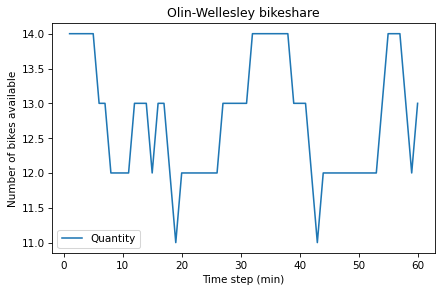

In [48]:
bikeshare = State(olin=14, wellesley=7)
run_simulation(p1=0.3,p2=0.2,num_steps=60)

## Under the Hood

This section contains additional information about the functions we've used and pointers to their documentation.

You don't need to know anything in this section, so if you are already feeling overwhelmed, you might want to skip it.
But if you are curious, read on.

`State` and `TimeSeries` objects are based on the `Series` object defined by the Pandas library.
The documentation is at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html>.

`Series` objects provide their own `plot` function, which is why we call it like this:

```
results.plot()
```

Instead of like this:

```
plot(results)
```

You can read the documentation of `Series.plot` at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html>.

`decorate` is based on Matplotlib, which is a widely used plotting library for Python.  Matplotlib provides separate functions for `title`, `xlabel`, and `ylabel`.
`decorate` makes them a little easier to use.
For the list of keyword arguments you can pass to `decorate`, see <https://matplotlib.org/3.2.2/api/axes_api.html?highlight=axes#module-matplotlib.axes>.

The `flip` function uses NumPy's `random` function to generate a random number between 0 and 1, then returns `True` or `False` with the given probability.

You can get the source code for `flip` (or any other function) by running the following cell.

In [44]:
source_code(flip)